<a href="https://colab.research.google.com/github/chukwumichaelmary/LST-GEE/blob/main/Thesis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thesis Topic: Human Mobility data for Improved Accessibility to Urban Parks in US Cities and Analysis of Travel Behavior in the Big Data Era**

**The Objective are:**

1) To retrieve aggregate data of park visits from different census blocks,

2) To compute the distance metrics from each census block (origin) to park (destination),

3) To reveal the correlation of park visitation based on socioeconomic and demographic variables (what categories of population frequent parks -- people characteristics),

4) Analyze why certain parks attract visitors from distant far census block than others(examine park characteristics)

# **Mount Google Drive on VM**

In [ ]:
# this allows you to read files directly from your Google Drive
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [ ]:
#### Change this to the directory on your Google Drive where you copied the data! ####
# data_directory = './drive/MyDrive/Projects/Public/Normalization/May 2021/Data/'
data_directory = './gdrive/'

patterns = data_directory + 'extracted_monthly_patterns.csv'

In [ ]:
# install libraries and dependencies

!pip install geopandas

In [ ]:
!pip install folium

In [ ]:
!pip install shapely

In [ ]:
!pip install pyproj

In [ ]:
!pip install geojson

Import python libraries and dependencies

In [ ]:
# Basic data science packages & OS paths
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os

%matplotlib inline

In [ ]:
# Geospatial data packages
import geopandas as gpd
import geojson
import datetime
from datetime import timedelta

from shapely import wkt
from shapely.geometry import Point


In [ ]:
# Visualization packages
import folium

In [ ]:
output_filename = 'extracted_monthly_patterns.csv'
output_directory = 'extracted_monthly_patterns'
output_path = os.path.join(output_directory,output_filename)

# **1) Exploratory Data Analysis Before Data Cleaning and Wrangling**

In [ ]:
# read the file with pandas

df=  pd.read_csv(patterns)

FileNotFoundError: [Errno 2] No such file or directory: './gdrive/extracted_monthly_patterns.csv'

In [ ]:
# display the dataframe (df)

df

,PLACEKEY,PARENT_PLACEKEY,SAFEGRAPH_BRAND_IDS,LOCATION_NAME,BRANDS,STORE_ID,TOP_CATEGORY,SUB_CATEGORY,NAICS_CODE,LATITUDE,...,RELATED_SAME_DAY_BRAND,RELATED_SAME_MONTH_BRAND,POPULARITY_BY_HOUR,POPULARITY_BY_DAY,DEVICE_TYPE,NORMALIZED_VISITS_BY_STATE_SCALING,NORMALIZED_VISITS_BY_REGION_NAICS_VISITS,NORMALIZED_VISITS_BY_REGION_NAICS_VISITORS,NORMALIZED_VISITS_BY_TOTAL_VISITS,NORMALIZED_VISITS_BY_TOTAL_VISITORS
0,zzz-222@627-wc8-73q,NaN,NaN,Minetta Playground,NaN,NaN,Other Amusement and Recreation Industries,All Other Amusement and Recreation Industries,713990,40.730619,...,"{""Western Union"":96,""Starbucks"":67,""Dunkin'"":5...","{""Western Union"":190,""Starbucks"":177,""Dunkin'""...","[6,9,3,1,0,0,3,6,15,15,15,15,22,22,31,50,41,32...","{""Monday"":31,""Tuesday"":34,""Wednesday"":34,""Thur...","{""ios"":158,""android"":45}",4750.0,0.003932,0.007321,0.000019,0.000539
1,zzz-222@627-s4t-975,NaN,NaN,St Nicholas Playground South,NaN,NaN,Other Amusement and Recreation Industries,All Other Amusement and Recreation Industries,713990,40.810869,...,"{""Western Union"":72,""Health Street"":48,""Impark...","{""Western Union"":175,""Walgreens"":134,""Health S...","[13,9,8,10,12,13,23,24,35,35,33,36,40,39,36,52...","{""Monday"":60,""Tuesday"":48,""Wednesday"":49,""Thur...","{""android"":133,""ios"":73}",6810.0,0.005595,0.010377,0.000027,0.000765
2,zzy-223@627-wgv-n3q,NaN,NaN,D'emic Playground,NaN,NaN,Other Amusement and Recreation Industries,All Other Amusement and Recreation Industries,713990,40.655975,...,"{""Western Union"":1209,""Starbucks"":1153,""Dunkin...","{""Western Union"":4334,""Dunkin'"":3844,""Starbuck...","[64,48,40,35,71,212,397,624,533,533,285,348,30...","{""Monday"":1142,""Tuesday"":1054,""Wednesday"":1024...","{""ios"":3539,""android"":1605}",134601.0,0.109356,0.201257,0.000527,0.014940
3,zzy-222@627-s5x-k75,NaN,NaN,New York City Department Of Parks And Recreation,NaN,NaN,Other Amusement and Recreation Industries,All Other Amusement and Recreation Industries,713990,40.882269,...,"{""Western Union"":62,""Dunkin'"":60,""BP"":45,""Star...","{""Western Union"":241,""Dunkin'"":214,""Starbucks""...","[47,48,54,42,37,41,71,90,69,69,82,79,89,87,101...","{""Monday"":114,""Tuesday"":89,""Wednesday"":92,""Thu...","{""ios"":205,""android"":100}",13248.0,0.011136,0.020734,0.000055,0.001510
4,zzz-222@627-s6d-djv,NaN,NaN,Wright Brothers Playground,NaN,NaN,Other Amusement and Recreation Industries,All Other Amusement and Recreation Industries,713990,40.831684,...,"{""Western Union"":16,""Dunkin'"":9,""USA Vein Clin...","{""Western Union"":43,""Dunkin'"":38,""Starbucks"":3...","[1,2,3,4,4,2,3,30,12,12,8,21,26,14,25,14,6,8,6...","{""Monday"":24,""Tuesday"":22,""Wednesday"":23,""Thur...","{""ios"":33,""android"":30}",2614.0,0.002152,0.003945,0.000010,0.000291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5351,zzy-222@627-wh4-brk,zzy-223@627-wh4-brk,NaN,Greenwood Playground,NaN,NaN,Other Amusement and Recreation Industries,All Other Amusement and Recreation Industries,713990,40.650441,...,"{""Western Union"":716,""Starbucks"":518,""Walgreen...","{""Western Union"":2347,""Starbucks"":1880,""Dunkin...","[66,41,14,16,13,62,170,440,345,345,206,190,275...","{""Monday"":845,""Tuesday"":916,""Wednesday"":984,""T...","{""ios"":2077,""android"":701}",77152.0,0.058681,0.107859,0.000243,0.008055
5352,zzw-224@627-wbv-kfz,22r-22g@627-wbv-kfz,NaN,Escape Games NYC,NaN,NaN,Other Amusement and Recreation Industries,All Other Amusement and Recreation Industries,713990,40.756763,...,"{""Western Union"":16627,""Starbucks"":15767,""FedE...","{""Western Union"":30352,""Starbucks"":28669,""CVS""...","[1859,1494,1327,1249,1242,1406,1713,2017,2404,...","{""Monday"":4604,""Tuesday"":5148,""Wednesday"":5577...","{""ios"":22215,""android"":10106}",551360.0,0.426728,0.795128,0.001764,0.058577
5353,229-222@627-s4w-3kf,NaN,NaN,The Cliffs at Harlem,NaN,NaN,Other Amusement and Recreation Industries,All Other Amusement and Recreation 

In [ ]:
# shape of df

df.shape

(5356, 53)

In [ ]:
# display the entire columns of the dataframe (df)

df.columns

Index(['PLACEKEY', 'PARENT_PLACEKEY', 'SAFEGRAPH_BRAND_IDS', 'LOCATION_NAME',
       'BRANDS', 'STORE_ID', 'TOP_CATEGORY', 'SUB_CATEGORY', 'NAICS_CODE',
       'LATITUDE', 'LONGITUDE', 'STREET_ADDRESS', 'CITY', 'REGION',
       'POSTAL_CODE', 'OPEN_HOURS', 'CATEGORY_TAGS', 'OPENED_ON', 'CLOSED_ON',
       'TRACKING_CLOSED_SINCE', 'WEBSITES', 'GEOMETRY_TYPE', 'POLYGON_WKT',
       'POLYGON_CLASS', 'ENCLOSED', 'PHONE_NUMBER', 'IS_SYNTHETIC',
       'INCLUDES_PARKING_LOT', 'ISO_COUNTRY_CODE', 'WKT_AREA_SQ_METERS',
       'DATE_RANGE_START', 'DATE_RANGE_END', 'RAW_VISIT_COUNTS',
       'RAW_VISITOR_COUNTS', 'VISITS_BY_DAY', 'POI_CBG', 'VISITOR_HOME_CBGS',
       'VISITOR_HOME_AGGREGATION', 'VISITOR_DAYTIME_CBGS',
       'VISITOR_COUNTRY_OF_ORIGIN', 'DISTANCE_FROM_HOME', 'MEDIAN_DWELL',
       'BUCKETED_DWELL_TIMES', 'RELATED_SAME_DAY_BRAND',
       'RELATED_SAME_MONTH_BRAND', 'POPULARITY_BY_HOUR', 'POPULARITY_BY_DAY',
       'DEVICE_TYPE', 'NORMALIZED_VISITS_BY_STATE_SCALING',
       'NORM

In [ ]:
# Checking start_date and end_date of the data (monthly data -- from January 2022 to January 2023)

df[['DATE_RANGE_START','DATE_RANGE_END']].tail()

,DATE_RANGE_START,DATE_RANGE_END
5351,2022-12-01 00:00:00.000,2023-01-01 00:00:00.000
5352,2022-12-01 00:00:00.000,2023-01-01 00:00:00.000
5353,2022-12-01 00:00:00.000,2023-01-01 00:00:00.000
5354,2022-12-01 00:00:00.000,2023-01-01 00:00:00.000
5355,2022-12-01 00:00:00.000,2023-01-01 00:00:00.000


We can see that each row represent each day of the month for each park POI. The data start_date is 01-01-2022 and ends at 01-01-2023. The presence of over 5000 rows is because each POI is visited more than once in a month. To get unique park POI, we filter placekey column using .unique() function

In [ ]:
# checking the uniquene placekey

unique_placekey = len(df['PLACEKEY'].unique())

print('There are {} unique Placekey representing each park POI'.format(unique_placekey))

There are 473 unique Placekey representing each park POI


# **2) Data Cleaning and Wrangling**

We need to iterate through each row in the dataset, focusing on two columns: 'placekey' and 'distance_from_cbg'. For each row, we'll examine the 'placekey' value and the nested dictionary in the 'distance_from_cbg' column. This dictionary contains census block IDs as keys (e.g., 360810693002, 360610235011) and corresponding visit counts as values (e.g., 4, 7, 10).

The script checks if the 'placekey' in the current row matches the 'placekey' in the previous row. If they match, it further examines whether the census blocks in the current row are the same as those in the previous row. If they are the same, it adds the visit counts to the corresponding census blocks. However, if the census blocks are different, it adds the new dictionary of census block IDs and visit counts to the list.

This process is repeated for all 473 unique 'placekey' values, resulting in a dataset with only 473 rows instead of the original 5356 rows.

**Filter columns for new DataFrame**

[['PLACEKEY','NAICS_CODE','LATITUDE','LONGITUDE','LOCATION_NAME','POSTAL_CODE','POLYGON_WKT','POI_CBG','RAW_VISIT_COUNTS','RAW_VISITOR_COUNTS', 'VISITS_BY_DAY','VISITOR_HOME_AGGREGATION','VISITOR_HOME_CBGS','DISTANCE_FROM_HOME']]




In [ ]:
def vertically_explode_json(df_, json_column='VISITOR_HOME_CBGS', key_col_name='visitor_home_cbg', value_col_name='cbg_visitor_count'):
    # This function vertically explodes a JSON column in SafeGraph Patterns
    # The resulting dataframe has one row for every data element in all the JSON of all the original rows
    # This is a slow step. If you are working with more than 20,000 rows you should explore faster implementations like pyspark, see here: https://docs.safegraph.com/docs/faqs#section-how-do-i-work-with-the-patterns-columns-that-contain-json

    # Inputs
    #    df -- a pandas.DataFrame -- dataframe with a unique df.index for every row
    #    json_column -- each element of this column is a stringified json blog. No elements can be NULL. # TODO: convert NA JSON columns to empty `{}` so function can handle them and just pass those rows through
    #    key_col_name -- arbitrary string, the name of the column in the output which contains the keys of the key:values of the JSON
    #    value_col_name -- arbitrary string, the name of the column in the output which contains the values of the key:values of the JSON
    # Outputs
    #    df -- a pandas.DataFrame with 2 new columns
    #    1) key_col_name
    #    2) value_col_name

    df = df_.copy()
    if(df.index.unique().shape[0] < df.shape[0]):
        raise("ERROR -- non-unique index found")
    df[json_column+'_dict'] = [json.loads(cbg_json) for cbg_json in df[json_column]]
    all_sgpid_cbg_data = [] # each cbg data point will be one element in this list
    for index, row in df.iterrows():
      # extract each key:value inside each visitor_home_cbg dict (2 nested loops)
      this_sgpid_cbg_data = [ {'orig_index' : index, key_col_name:key, value_col_name:value} for key,value in row[json_column+'_dict'].items() ]
      all_sgpid_cbg_data = all_sgpid_cbg_data + this_sgpid_cbg_data
    output = pd.DataFrame(all_sgpid_cbg_data)
    output.set_index('orig_index', inplace=True)
    return(output)

def explode_visitor_home_cbg(df, json_column='VISITOR_HOME_CBGS', key_col_name='visitor_home_cbg', value_col_name='cbg_visitor_count', keep_index=False):
    if(keep_index):
        df['index_original'] = df.index
    df = df.dropna(subset = [json_column]).copy() # Drop nan jsons
    df.reset_index(drop=True, inplace=True) # Every row must have a unique index
    df_exp = vertically_explode_json(df, json_column=json_column, key_col_name=key_col_name, value_col_name=value_col_name)
    df = df.merge(df_exp, left_index=True, right_index=True).reset_index(drop=True)
    return(df)

In [ ]:
# explode visitor_home_cbg and select columns to bring along new DataFrame (sgcore)

cols_to_bring = ['PLACEKEY','NAICS_CODE','LATITUDE','LONGITUDE','LOCATION_NAME','POSTAL_CODE','DISTANCE_FROM_HOME','POLYGON_WKT','POI_CBG','RAW_VISIT_COUNTS','RAW_VISITOR_COUNTS', 'VISITS_BY_DAY','VISITOR_HOME_AGGREGATION','VISITOR_HOME_CBGS']

sgcore = explode_visitor_home_cbg(df[cols_to_bring])

In [ ]:
sgcore.sample(20)

,PLACEKEY,NAICS_CODE,LATITUDE,LONGITUDE,LOCATION_NAME,POSTAL_CODE,DISTANCE_FROM_HOME,POLYGON_WKT,POI_CBG,RAW_VISIT_COUNTS,RAW_VISITOR_COUNTS,VISITS_BY_DAY,VISITOR_HOME_AGGREGATION,VISITOR_HOME_CBGS,visitor_home_cbg,cbg_visitor_count
522630,zzy-222@627-wh3-4n5,713990,40.663134,-73.989812,Purple Playground,11215.0,7192.0,POLYGON ((-73.98889582753861 40.66241300534664...,3.604701e+11,1164.0,1036.0,"[45,31,40,37,42,43,27,41,37,42,44,40,41,25,39,...","{""36047049000"":15,""36047150200"":11,""3604705040...","{""360470490002"":7,""360470490001"":7,""3604705040...",360470584002,4
484733,222-22v@627-wbz-snq,713990,40.709197,-74.010168,Multicultural Walks In NYC,10038.0,19902.0,POLYGON ((-74.00988934899993 40.70903237400006...,3.606100e+11,22368.0,13714.0,"[620,506,508,434,771,855,886,722,589,536,873,9...","{""36061001502"":190,""36061000700"":155,""36061001...","{""360610007001"":155,""360610015021"":115,""360610...",CA:35260102,5
366849,zzz-222@627-s4m-4qf,713990,40.800965,-73.963704,Booker T Washington Playground,10025.0,2869.0,POLYGON ((-73.96310982046077 40.80095740462384...,3.606102e+11,711.0,297.0,"[33,29,38,23,22,32,16,35,25,35,14,12,26,23,43,...","{""36061019300"":50,""36061019500"":25,""3606101890...","{""360610193005"":15,""360610193006"":12,""36061019...",360610189005,4
485825,zzy-228@627-wc7-3kf,713990,40.721858,-73.996421,DeSalvio Playground,10079.0,16819.0,POLYGON ((-73.99714037499996 40.72175356600007...,3.606100e+11,2742.0,2243.0,"[94,91,84,40,94,87,91,87,132,91,93,80,69,84,97...","{""36061004100"":33,""36061004300"":19,""3606101110...","{""360610111001"":14,""360610041006"":11,""36061004...",360610148024,4
339798,22r-222@627-s8q-zs5,713990,40.753242,-73.975449,Secret City Scavenger Hunts,10017.0,29274.0,"POLYGON ((-73.974825178417 40.753343104400365,...",3.606101e+11,5847.0,4227.0,"[236,253,182,130,78,216,263,254,247,216,120,95...","{""36061009200"":67,""36061009000"":37,""3606100880...","{""360610092001"":67,""360610090001"":17,""36061011...",090010205002,4
148540,zzy-223@627-s96-bff,713990,40.699202,-73.962229,Classon Playground,11211.0,14802.0,"POLYGON ((-73.9619828057776 40.6982811969892, ...",3.604705e+11,42536.0,22669.0,"[1156,1253,1207,1282,1330,844,1095,1239,1360,1...","{""36047001500"":73,""36085020801"":45,""3608104790...","{""360810716001"":41,""360610007001"":39,""36047001...",360810205002,9
669564,222-229@627-wc2-73q,713990,40.713132,-74.015529,True Sailing NYC,10281.0,21414.0,POLYGON ((-74.01613549978937 40.71472126077292...,3.606103e+11,30515.0,15803.0,"[648,552,967,980,1030,1273,1089,928,735,974,12...","{""36061031703"":191,""36061001300"":168,""36061001...","{""360610013001"":133,""360610317032"":128,""360610...",360470392002,5
344761,22s-226@627-s8h-xyv,713990,40.744443,-73.989645,My Cooking Party,10010.0,17190.0,POLYGON ((-73.99039932899996 40.74483072800007...,3.606101e+11,7102.0,5654.0,"[241,238,304,296,160,189,243,221,229,291,282,2...","{""36061009500"":71,""36061009100"":47,""3606100580...","{""360610095001"":65,""360610058001"":41,""36061009...",360470484001,4
801155,zzy-222@627-wh4-brk,713990,40.650441,-73.976547,Greenwood Playground,11218.0,5242.0,POLYGON ((-73.97611731681965 40.64941819646396...,3.604705e+11,6878.0,3126.0,"[324,331,343,308,213,174,326,262,306,315,197,1...","{""36047049400"":64,""36047050400"":60,""3604705000...","{""360470494003"":30,""360470504003"":30,""36047050...",360470412002,14
483719,zzz-222@627-s4v-5pv,713990,40.792822,-73.943201,Poor Richard's Playground,10029.0,3982.0,POLYGON ((-73.94319197216295 40.79331732385125...,3.606102e+11,418.0,238.0,"[10,13,10,7,21,16,12,14,16,11,13,11,14,14,14,9...","{""36061017000"":24,""36061018000"":13,""3606101620...","{""360610170001"":14,""360610180002"":7,""360610170...",360610162004,4


In [ ]:
sgcore.columns

Index(['PLACEKEY', 'NAICS_CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION_NAME',
       'POSTAL_CODE', 'DISTANCE_FROM_HOME', 'POLYGON_WKT', 'POI_CBG',
       'RAW_VISIT_COUNTS', 'RAW_VISITOR_COUNTS', 'VISITS_BY_DAY',
       'VISITOR_HOME_AGGREGATION', 'VISITOR_HOME_CBGS', 'visitor_home_cbg',
       'cbg_visitor_count'],
      dtype='object')

In [ ]:
# Display the size of the data (sgcore) and unique POI

print(sgcore.shape)
print("Unique POI: {0}".format(sgcore.PLACEKEY.nunique()))

(838046, 16)
Unique POI: 417


Now we trim the data by using the .group() for all columns and sum the 'cbg_visitor_count' column-- this leaves us with unique POIs of visitors from across over 3000 census blocks

In [ ]:
sgcore = sgcore.groupby(['PLACEKEY','visitor_home_cbg','NAICS_CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION_NAME',
       'POSTAL_CODE', 'DISTANCE_FROM_HOME', 'POLYGON_WKT', 'POI_CBG',
       'RAW_VISIT_COUNTS', 'RAW_VISITOR_COUNTS', 'VISITS_BY_DAY',
       'VISITOR_HOME_AGGREGATION']).agg({'cbg_visitor_count':sum}).reset_index()

Drop all census blocks not beginning with '360' because we are only interested with census blocks in New York City

In [ ]:
sgcore = sgcore[sgcore['visitor_home_cbg'].str.startswith('360')]

In [ ]:
sgcore.shape

(237791, 15)

In [ ]:
sgcore.sample(20)

,PLACEKEY,visitor_home_cbg,NAICS_CODE,LATITUDE,LONGITUDE,LOCATION_NAME,POSTAL_CODE,DISTANCE_FROM_HOME,POLYGON_WKT,POI_CBG,RAW_VISIT_COUNTS,RAW_VISITOR_COUNTS,VISITS_BY_DAY,VISITOR_HOME_AGGREGATION,cbg_visitor_count
145977,237-222@627-wbv-ghq,360470924003,713990,40.753205,-73.991289,Exit Escape Room NYC,10018.0,24631.0,POLYGON ((-73.99183618799998 40.75397499300004...,3.606101e+11,7545.0,5874.0,"[259,259,243,243,271,195,228,243,258,304,256,2...","{""36061011100"":89,""36061010900"":45,""3606101150...",4
315882,zzz-222@627-s4m-bkz,360610187003,713990,40.795403,-73.968681,Happy Warrior Playground,10025.0,3897.0,"POLYGON ((-73.9684607135703 40.79588242630036,...",3.606102e+11,608.0,289.0,"[19,17,31,22,10,27,20,31,24,28,19,13,23,24,27,...","{""36061018700"":21,""36061018100"":19,""3606101890...",12
201004,zzw-227@627-s8k-2c5,360810024002,713990,40.753632,-73.986574,KidPass,10018.0,16782.0,POLYGON ((-73.98621430599997 40.75354443400005...,3.606101e+11,18302.0,12255.0,"[442,357,577,615,581,704,667,554,469,615,641,7...","{""36061011300"":147,""36061011500"":116,""36061012...",4
312745,zzy-22w@627-s8j-h3q,360610279003,713990,40.735831,-73.991376,Evelyn's Playground,10003.0,9903.0,POLYGON ((-73.99301385399997 40.73603417400005...,3.606101e+11,2800.0,1551.0,"[40,47,89,94,105,113,100,68,36,85,99,112,119,1...","{""36061006100"":18,""36061004400"":17,""3606100540...",4
60141,225-22z@627-s4r-2tv,360610120003,713990,40.768662,-73.982818,WeBop,10019.0,12194.0,"POLYGON ((-73.982656568 40.768251589, -73.9826...",3.606101e+11,8048.0,4661.0,"[233,233,254,232,238,252,251,243,193,229,227,2...","{""36061014500"":120,""36061013700"":86,""360610151...",8
286313,zzy-225@627-s4n-hbk,360810277004,713990,40.775025,-73.964800,James Michael Levin Playground,10075.0,13735.0,POLYGON ((-73.96390765099994 40.77524594900006...,3.606101e+11,4187.0,3219.0,"[120,93,116,118,107,144,150,145,142,93,151,149...","{""36061013000"":52,""36061015002"":41,""3606101420...",4
304333,zzy-227@627-wc9-3wk,360470298001,713990,40.696295,-73.997595,Pierrepont Playground,11201.0,12084.0,POLYGON ((-73.99728632001353 40.69600575065038...,3.604700e+11,966.0,860.0,"[24,25,26,43,31,36,40,29,29,47,44,52,32,28,37,...","{""36047000501"":10,""36047000301"":9,""36047000100...",4
90582,22f-222@627-s8r-qfz,360610072004,713990,40.756996,-73.962354,Adventures On Horseback,10022.0,11333.0,POLYGON ((-73.96321224199994 40.75734681100005...,3.606101e+11,5797.0,3272.0,"[115,118,153,168,182,183,145,148,119,169,207,2...","{""36061010601"":85,""36061010800"":59,""3606100860...",32
105167,22m-222@627-s8r-p9z,360050297001,713990,40.768515,-73.968969,Lotos Club,10065.0,13700.0,POLYGON ((-73.96905073999994 40.76837021600005...,3.606101e+11,1938.0,1469.0,"[65,50,73,80,65,57,58,43,61,64,70,67,61,38,39,...","{""36061012000"":20,""36061012200"":18,""3606101530...",4
29716,222-22h@627-s8j-rkz,360810942011,713990,40.739731,-73.976214,Tian Wei Food Tours,10016.0,12318.0,POLYGON ((-73.97567894899998 40.73987488300003...,3.606101e+11,6466.0,3867.0,"[259,242,280,264,159,91,260,276,289,307,300,18...","{""36061006200"":75,""36061006600"":36,""3606100700...",20


# **Loading Census Data **

In [ ]:
# read metadata
metadata_ = pd.read_json()

In [ ]:
census_gdf = gpd.read_file('/content/extracted_monthly_patterns/acs2022_5yr_B02001_14000US06037702400.geojson')

In [ ]:
census_gdf

,geoid,name,B02001001,"B02001001, Error",B02001002,"B02001002, Error",B02001003,"B02001003, Error",B02001004,"B02001004, Error",...,"B02001006, Error",B02001007,"B02001007, Error",B02001008,"B02001008, Error",B02001009,"B02001009, Error",B02001010,"B02001010, Error",geometry
0,05000US06037,"Los Angeles County, CA",9936690.0,NaN,3937901.0,15726.0,780993.0,4075.0,111096.0,4232.0,...,1000.0,2253956.0,17704.0,1355710.0,15512.0,992433.0,15888.0,363277.0,7158.0,"MULTIPOLYGON (((-118.67820 33.03973, -118.6756..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4014.0,473.0,2426.0,318.0,161.0,162.0,8.0,16.0,...,13.0,397.0,300.0,632.0,275.0,410.0,222.0,222.0,120.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",4164.0,822.0,2909.0,789.0,76.0,86.0,22.0,38.0,...,13.0,240.0,150.0,335.0,162.0,123.0,97.0,212.0,113.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3481.0,467.0,1904.0,314.0,0.0,13.0,87.0,101.0,...,13.0,469.0,319.0,588.0,316.0,502.0,312.0,86.0,62.0,"MULTIPOLYGON (((-118.28592 34.25404, -118.2859..."
4,14000US06037101221,"Census Tract 1012.21, Los Angeles, CA",3756.0,687.0,2181.0,682.0,101.0,82.0,35.0,59.0,...,13.0,711.0,381.0,414.0,200.0,354.0,172.0,60.0,73.0,"MULTIPOLYGON (((-118.29792 34.25597, -118.2969..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,14000US06037980038,"Census Tract 9800.38, Los Angeles, CA",0.0,13.0,0.0,13.0,0.0,13.0,0.0,13.0,...,13.0,0.0,13.0,0.0,13.0,0.0,13.0,0.0,13.0,"MULTIPOLYGON (((-118.39099 34.00167, -118.3909..."
2495,14000US06037980039,"Census Tract 9800.39, Los Angeles, CA",0.0,13.0,0.0,13.0,0.0,13.0,0.0,13.0,...,13.0,0.0,13.0,0.0,13.0,0.0,13.0,0.0,13.0,"MULTIPOLYGON (((-118.36215 34.13903, -118.3612..."
2496,14000US06037990100,"Census Tract 9901, Los Angeles, CA",0.0,13.0,0.0,13.0,0.0,13.0,0.0,13.0,...,13.0,0.0,13.0,0.0,13.0,0.0,13.0,0.0,13.0,"MULTIPOLYGON (((-118.95114 33.99643, -118.9505..."
2497,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,13.0,0.0,13.0,0.0,13.0,0.0,13.0,...,13.0,0.0,13.0,0.0,13.0,0.0,13.0,0.0,13.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


# **Maps**
We load Geojson file for New York City and visualize the Boroughs

In [ ]:
gdf = gpd.read_file('/content/extracted_monthly_patterns/NY_tiger.json')

In [ ]:
gdf.sample(20)

,OBJECTID,CTLabel,BoroCode,BoroName,CT2020,BoroCT2020,CDEligibil,NTAName,NTA2020,CDTA2020,CDTANAME,GEOID,PUMA,Shape__Area,Shape__Length,geometry
956,957,637,4,Queens,063700,4063700,None,Glendale,QN0503,QN05,QN05 Ridgewood-Maspeth-Middle Village (CD 5 Ap...,36081063700,4405,7.447867e+06,12467.850284,"POLYGON ((-73.85729 40.71148, -73.85668 40.707..."
962,963,463,4,Queens,046300,4046300,None,Elmhurst,QN0401,QN04,QN04 Elmhurst-Corona (CD 4 Approximation),36081046300,4404,1.710782e+06,6629.770303,"POLYGON ((-73.86809 40.74561, -73.86791 40.744..."
1101,1102,152,1,Manhattan,015200,1015200,None,Upper East Side-Yorkville,MN0803,MN08,MN08 Upper East Side-Roosevelt Island (CD 8 Eq...,36061015200,4108,1.963639e+06,9520.674690,"MULTIPOLYGON (((-73.94246 40.77742, -73.94230 ..."
2232,2233,596,4,Queens,059600,4059600,None,Cambria Heights,QN1304,QN13,QN13 Queens Village-Bellerose-Rosedale (CD 13 ...,36081059600,4413,2.094112e+06,6089.767348,"POLYGON ((-73.73397 40.69916, -73.73488 40.697..."
2,3,6,1,Manhattan,000600,1000600,None,Chinatown-Two Bridges,MN0301,MN03,MN03 Lower East Side-Chinatown (CD 3 Equivalent),36061000600,4103,2.582705e+06,6976.286215,"POLYGON ((-73.99022 40.71441, -73.98934 40.714..."
762,763,857,4,Queens,085700,4085700,None,Flushing-Willets Point,QN0707,QN07,QN07 Flushing-Murray Hill-Whitestone (CD 7 App...,36081085700,4407,1.425026e+06,5338.436573,"POLYGON ((-73.81923 40.75796, -73.81984 40.757..."
1606,1607,437,3,Brooklyn,043700,3043700,None,Bushwick (East),BK0402,BK04,BK04 Bushwick (CD 4 Equivalent),36047043700,4304,1.809984e+06,5385.659378,"POLYGON ((-73.90580 40.69414, -73.90504 40.693..."
1419,1420,234,3,Brooklyn,023400,3023400,None,Borough Park,BK1202,BK12,BK12 Borough Park-Kensington (CD 12 Approximat...,36047023400,4312,1.827231e+06,6241.897363,"POLYGON ((-73.98376 40.63273, -73.98435 40.632..."
1604,1605,435,3,Brooklyn,043500,3043500,None,Bushwick (East),BK0402,BK04,BK04 Bushwick (CD 4 Equivalent),36047043500,4304,1.810895e+06,5385.051618,"POLYGON ((-73.90880 40.69585, -73.91036 40.694..."
2289,2290,87,4,Queens,008700,4008700,None,Old Astoria-Hallets Point,QN0102,QN01,QN01 Astoria-Queensbridge (CD 1 Equivalent),36081008700,4401,2.724488e+06,7306.147823,"POLYGON ((-73.93105 40.77399, -73.93182 40.774..."


<Axes: >

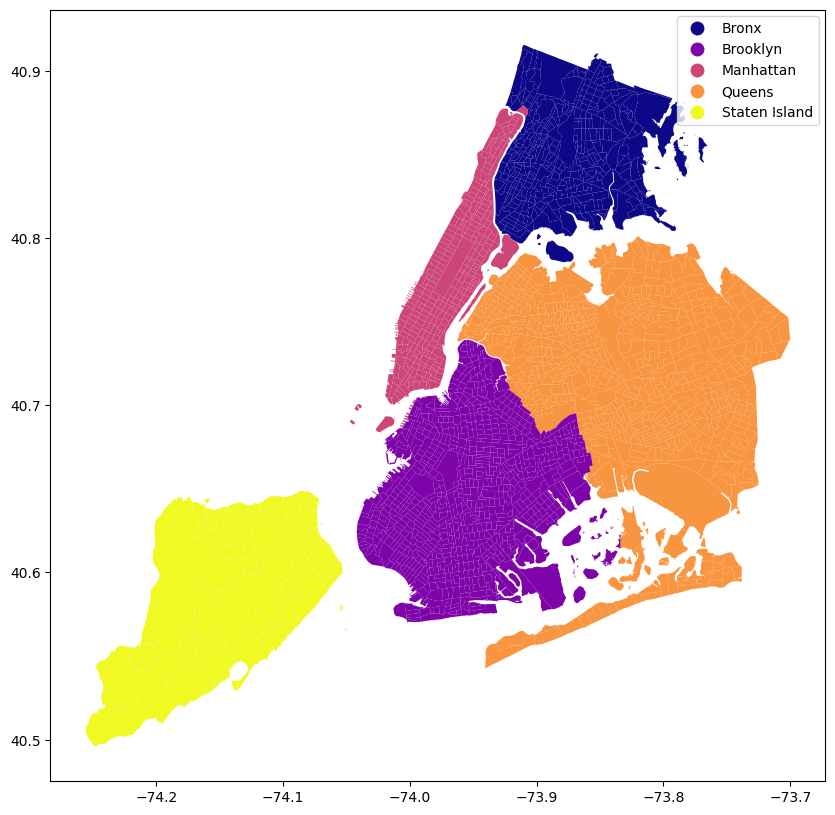

In [ ]:
gdf.plot(figsize=(10,12),
         cmap='plasma',
         column='BoroName',
         legend=True)